<a href="https://colab.research.google.com/github/abuyabva/TIABD/blob/main/Pract2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#№1
Найти и выгрузить многомерные данные (с большим количеством
признаков – столбцов) с использованием библиотеки pandas. В отчёте
описать найденные данные

In [ ]:
import pandas as pd

data = pd.read_csv("WineQT.csv")

#№2
Вывести информацию о данных при помощи методов .info(), .head().
Проверить данные на наличие пустых значений. В случае их наличия
удалить данные строки или интерполировать пропущенные значения.
При необходимости дополнительно предобработать данные для
дальнейшей работы с ними

In [ ]:
print(f"Информация о датасете:")
print(data.info())
print("Первые пять строк:\n", data.head(5))
print("Информация о пустых ячейках:\n", data.isna().sum())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
Первые пять строк:
    fixed acidity  volatile 

#№3
Построить столбчатую диаграмму (.bar) с использованием модуля
graph_objs из библиотеки Plotly со следующими параметрами:
  1. По оси Х указать дату или название, по оси У указать количественный
показатель.
  2. Сделать так, чтобы столбец принимал цвет в зависимости от значения
показателя (marker=dict(color=признак, coloraxis="coloraxis")).
  3. Сделать так, чтобы границы каждого столбца были выделены чёрной
линией с толщиной равной 2.
  4. Отобразить заголовок диаграммы, разместив его по центру сверху, с
20 размером текста.
  5. Добавить подписи для осей X и Y с размером текста, равным 16. Для
оси абсцисс развернуть метки так, чтобы они читались под углом,
равным 315.
  6. Размер текста меток осей сделать равным 14.
  7. Расположить график во всю ширину рабочей области и присвоить
высоту, равную 700 пикселей.
  8. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2. (Можно сделать это при настройке осей с помощью gridwidth=2, gridcolor='ivory')
  9. Убрать лишние отступы по краям.

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

names = list(data.columns)[:-1]
mean_values = [data[name].mean() for name in names]

fig = go.Figure()
fig.add_trace(go.Bar(
    x = names, y = mean_values,
    marker = dict(color=list(range(len(names))), coloraxis = "coloraxis",
                line = dict(color="black", width=2))))

fig.update_xaxes(
    title_text = "Признаки вина",
    tickangle = 315,
    title_font = dict(size=16),
    tickfont = dict(size=14),
    gridwidth = 2,
    gridcolor = 'ivory'
)

fig.update_yaxes(
    title_text = "Среднее значение признака",
    title_font = dict(size=16),
    tickfont = dict(size=14),
    gridwidth = 2,
    gridcolor = 'ivory'
)

fig.update_layout(
    title = dict(text = "Диаграмма средних значений признаков вин",
                 x = 0.5, y = 0.95, font_size = 20),
    margin = dict(l = 50, r = 50, t = 75, b = 150),
    width = None,
    height = 700,
)

fig.show()

#№4
Построить круговую диаграмму (go.Pie), использовав данные и стиль
оформления из предыдущего графика. Сделать так, чтобы границы
каждой доли были выделены чёрной линией с толщиной, равной 2 и
категории круговой диаграммы были читаемы (к примеру, объединить
часть объектов)

In [ ]:
import numpy as np

fig = go.Figure()

colors = list(range(len(names)))

fig.add_trace(go.Pie(
    labels=names,
    values=mean_values,
    hole=.3,
    marker_line_color='rgba(68, 68, 68, 0.2)',
    marker_line_width=2,
    textinfo='label+percent',
    hoverinfo='text+value',
    textposition='outside',
    insidetextorientation='radial',
    rotation=90,
    sort=False
))

fig.update_layout(
    title=dict(text="Круговая диаграмма", x=0.5, y=0.95, font_size=20),
    margin=dict(l=0, r=0, t=75, b=50),
    width=None,
    height=700,
    paper_bgcolor='ivory',
    plot_bgcolor='ivory',
)

fig.update_traces(hoverinfo='text+value+percent+label',
                  textposition='outside',
                  textfont_size=14,
                  marker_colors=colors,
                  marker_line_color='black',
                  marker_line_width=2)

fig.show()

#№5
Построить линейные графики, взять один из параметров и определить
зависимость между другими несколькими (от 2 до 5) показателями с
использованием библиотеки matplotlib. Сделать вывод.
  1. Сделать график с линиями и маркерами, цвет линии 'crimson', цвет
точек 'white', цвет границ точек 'black', толщина границ точек равна 2.
  2. Добавить сетку на график, сделать её цвет 'mistyrose' и толщину
равную 2. (Можно сделать это при настройке осей с помощью
linewidth=2, color='mistyrose').

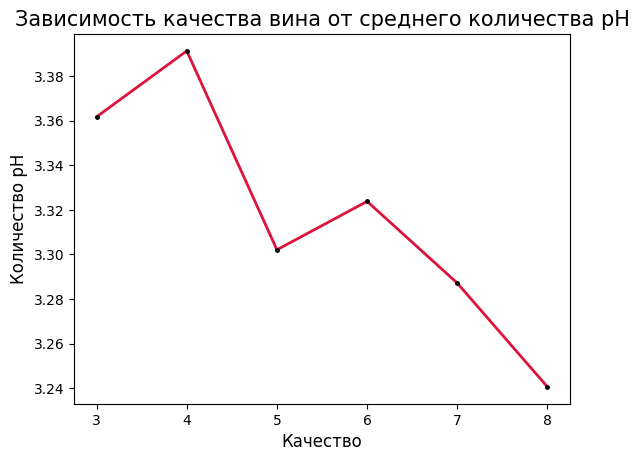

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt


quality_ph_dict = dict()

for index, row in data.iterrows():
  if row['quality'] in quality_ph_dict.keys():
    quality_ph_dict[row['quality']].append(row['pH'])
  else:
    quality_ph_dict[row['quality']] = [row['pH']]

for key, val in quality_ph_dict.items():
  if quality_ph_dict[key]:
    quality_ph_dict[key] = sum(quality_ph_dict[key]) / len(quality_ph_dict[key])

quality_ph_dict = dict(sorted(quality_ph_dict.items()))

plt.figure()
plt.title("Зависимость качества вина от среднего количества pH", fontsize=15)
plt.xlabel(f"Качество", fontsize=12)
plt.ylabel(f"Количество pH", fontsize=12)
plt.plot(
    quality_ph_dict.keys(),
    quality_ph_dict.values(),
    marker='.',
    color='crimson',
    markerfacecolor='white',
    markeredgecolor='black',
    linewidth=2,
    markersize=3,
    markeredgewidth=2
)
plt.show()

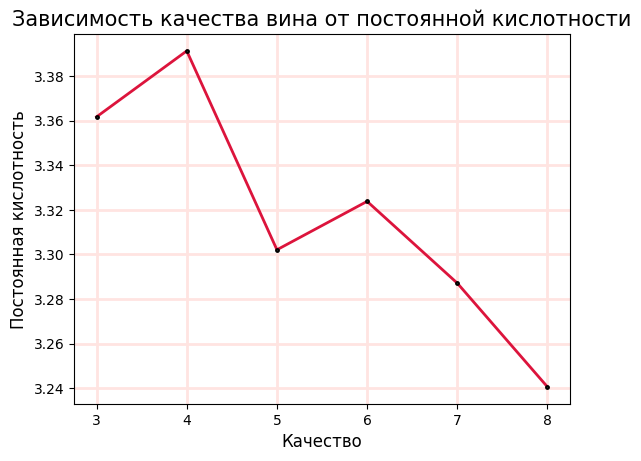

In [ ]:
ph_fixed_acidity = dict()
for index, row in data.iterrows():
  ph_fixed_acidity[row['pH']] = row['fixed acidity']

ph_fixed_acidity = dict(sorted(ph_fixed_acidity.items()))

plt.figure()
plt.grid(True, linewidth=2, color='mistyrose')
plt.title("Зависимость качества вина от постоянной кислотности", fontsize=15)
plt.xlabel(f"Качество", fontsize=12)
plt.ylabel(f"Постоянная кислотность", fontsize=12)
plt.plot(
    quality_ph_dict.keys(),
    quality_ph_dict.values(),
    marker='.',
    color='crimson',
    markerfacecolor='white',
    markeredgecolor='black',
    linewidth=2,
    markersize=3,
    markeredgewidth=2
)
plt.show()

#№6
Выполнить визуализацию многомерных данных, используя t-SNE.
Необходимо использовать набор данных MNIST или fashion MNIST
(можно использовать и другие готовые наборы данных, где можно
наблюдать разделение объектов по кластерам). Рассмотреть
результаты визуализации для разных значений перплексии.

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing
import time
from sklearn.datasets import load_iris
!pip install tensorflow
from tensorflow.keras.datasets import mnist

In [ ]:
import pandas as pd


(x, y), _ = mnist.load_data()

x = x[:1000]
y = y[:1000]

df = pd.DataFrame(x.reshape(-1, 784), columns=[f'pixel_{i}' for i in range(784)])
df['label'] = y

print(df.shape)
print(df.columns)

(1000, 785)
Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778', 'pixel_779',
       'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783', 'label'],
      dtype='object', length=785)


In [ ]:
del_list = ['label']

D = df.drop(del_list, axis=1)

print(D.columns)
print(D.shape)

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_774', 'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778',
       'pixel_779', 'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783'],
      dtype='object', length=784)
(1000, 784)


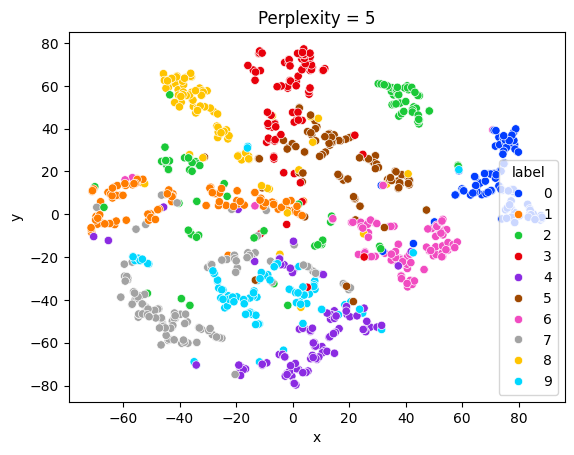

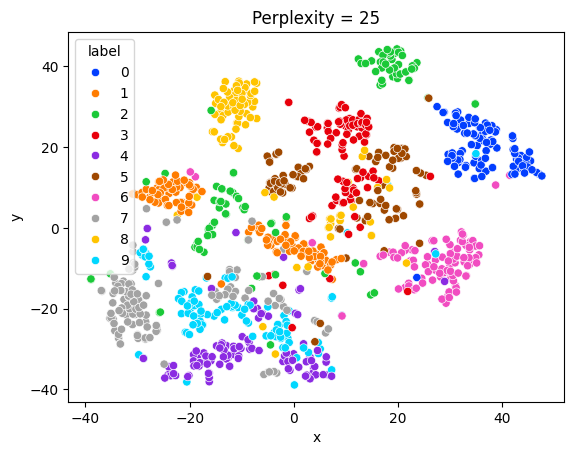

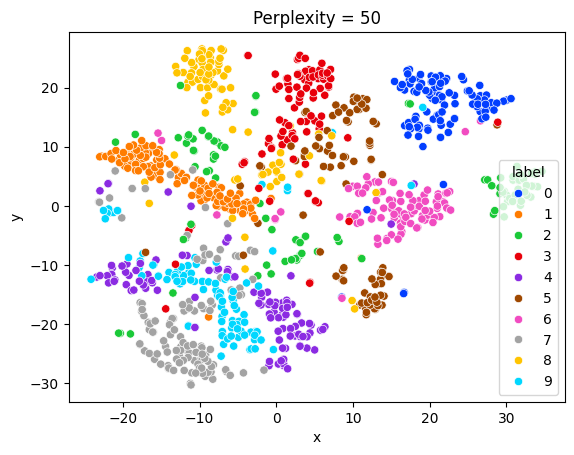

In [ ]:
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns = D.columns)

start_time = time.time()

for perp in [5, 25, 50]:

  T = TSNE(n_components=2, perplexity=perp, random_state=123)

  TSNE_features = T.fit_transform(D)

  DATA = D.copy()
  DATA['x'] = TSNE_features[:,0]
  DATA['y'] = TSNE_features[:,1]

  plt.figure()
  plt.title(f"Perplexity = {perp}")
  sns.scatterplot(x='x', y='y', hue=df['label'], data=DATA, palette='bright')
  plt.show()

end_time = time.time()
TSNE_time = end_time - start_time

#№7
Выполнить визуализацию многомерных данных, используя UMAP с
различными параметрами n_neighbors и min_dist. Рассчитать время
работы алгоритма с помощью библиотеки time и сравнить его с
временем работы t-SNE

In [ ]:
!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



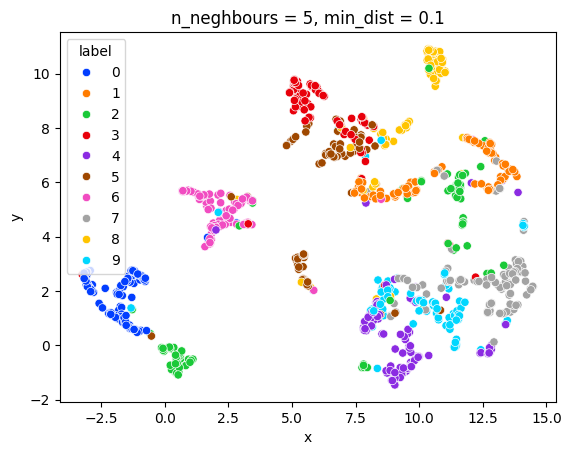

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



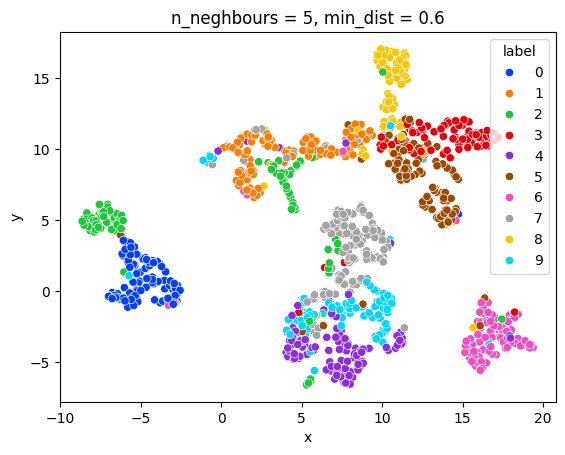

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



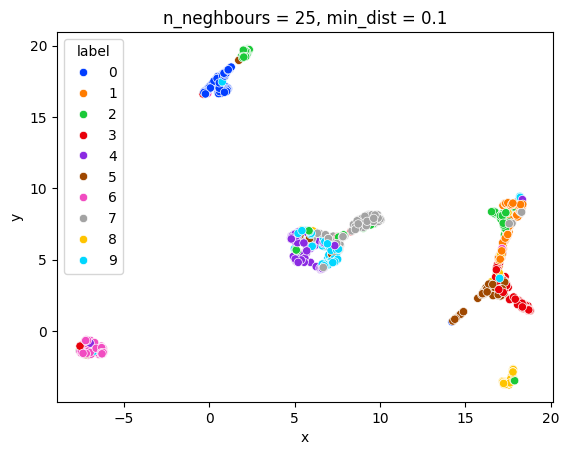

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



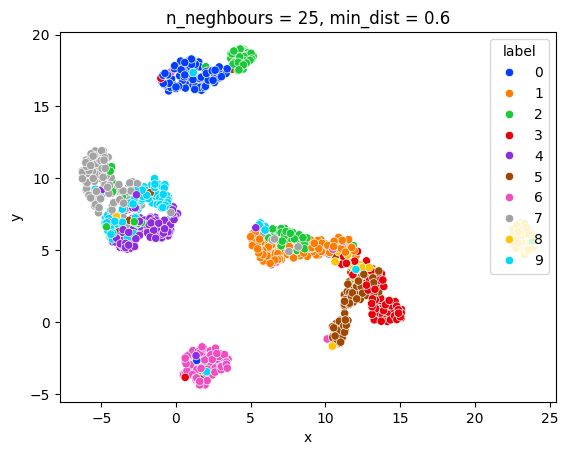

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



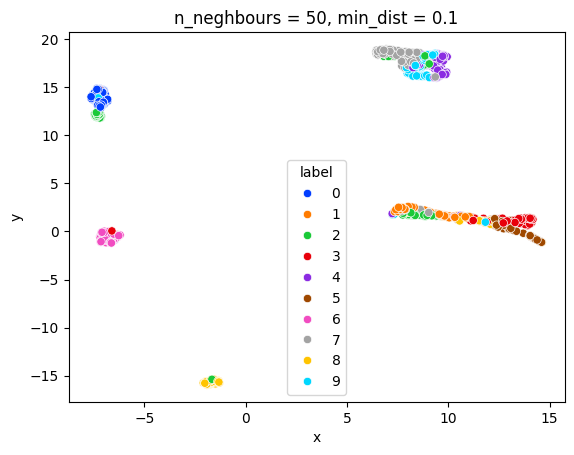

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



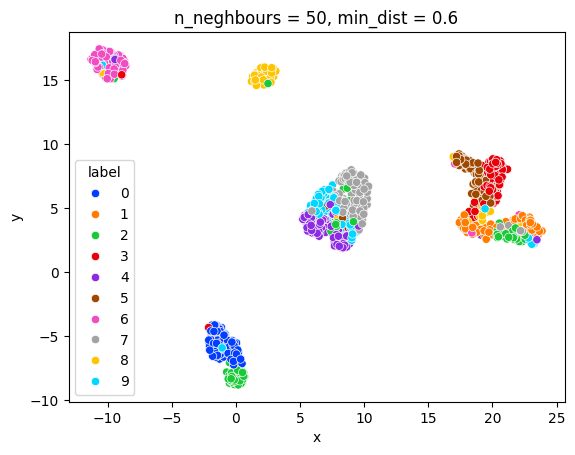

In [ ]:
from umap import UMAP


n_n = (5, 25, 50)
m_d = (0.1, 0.6)

um = dict()
DATA = D.copy()

start_time = time.time()

for i in range(len(n_n)):
  for j in range(len(m_d)):
    um[(n_n[i], m_d[j])] = (UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=123).fit_transform(DATA))
    DATA['x'] = um[(n_n[i], m_d[j])][:,0]
    DATA['y'] = um[(n_n[i], m_d[j])][:,1]

    plt.figure()
    plt.title(f"n_neghbours = {n_n[i]}, min_dist = {m_d[j]}")
    sns.scatterplot(x='x', y='y', hue=df['label'], data=DATA, palette='bright')
    plt.show()

end_time = time.time()
UMAP_time = end_time - start_time

In [ ]:
print(f"Время выполнения TSNE = {TSNE_time}\nВремя выполнения UMAP = {UMAP_time}")

Время выполнения TSNE = 52.25534129142761
Время выполнения UMAP = 57.16920256614685
